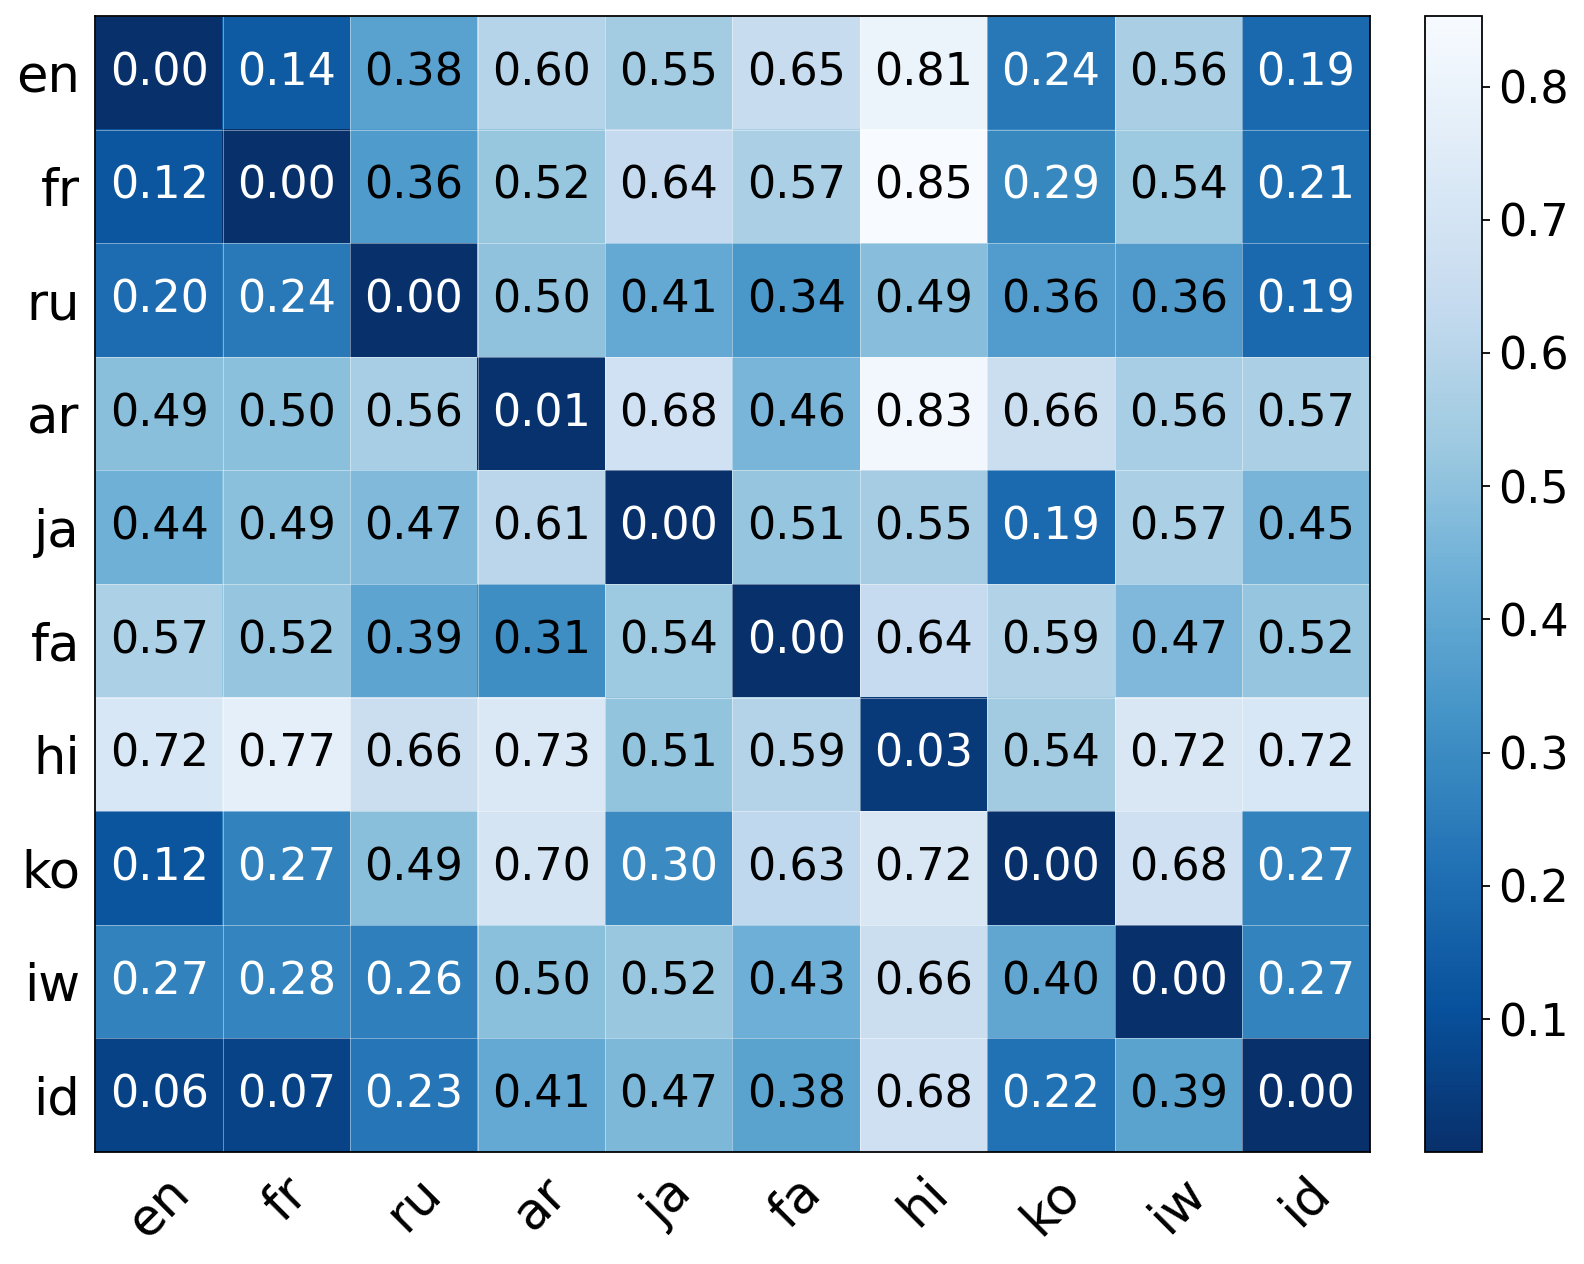

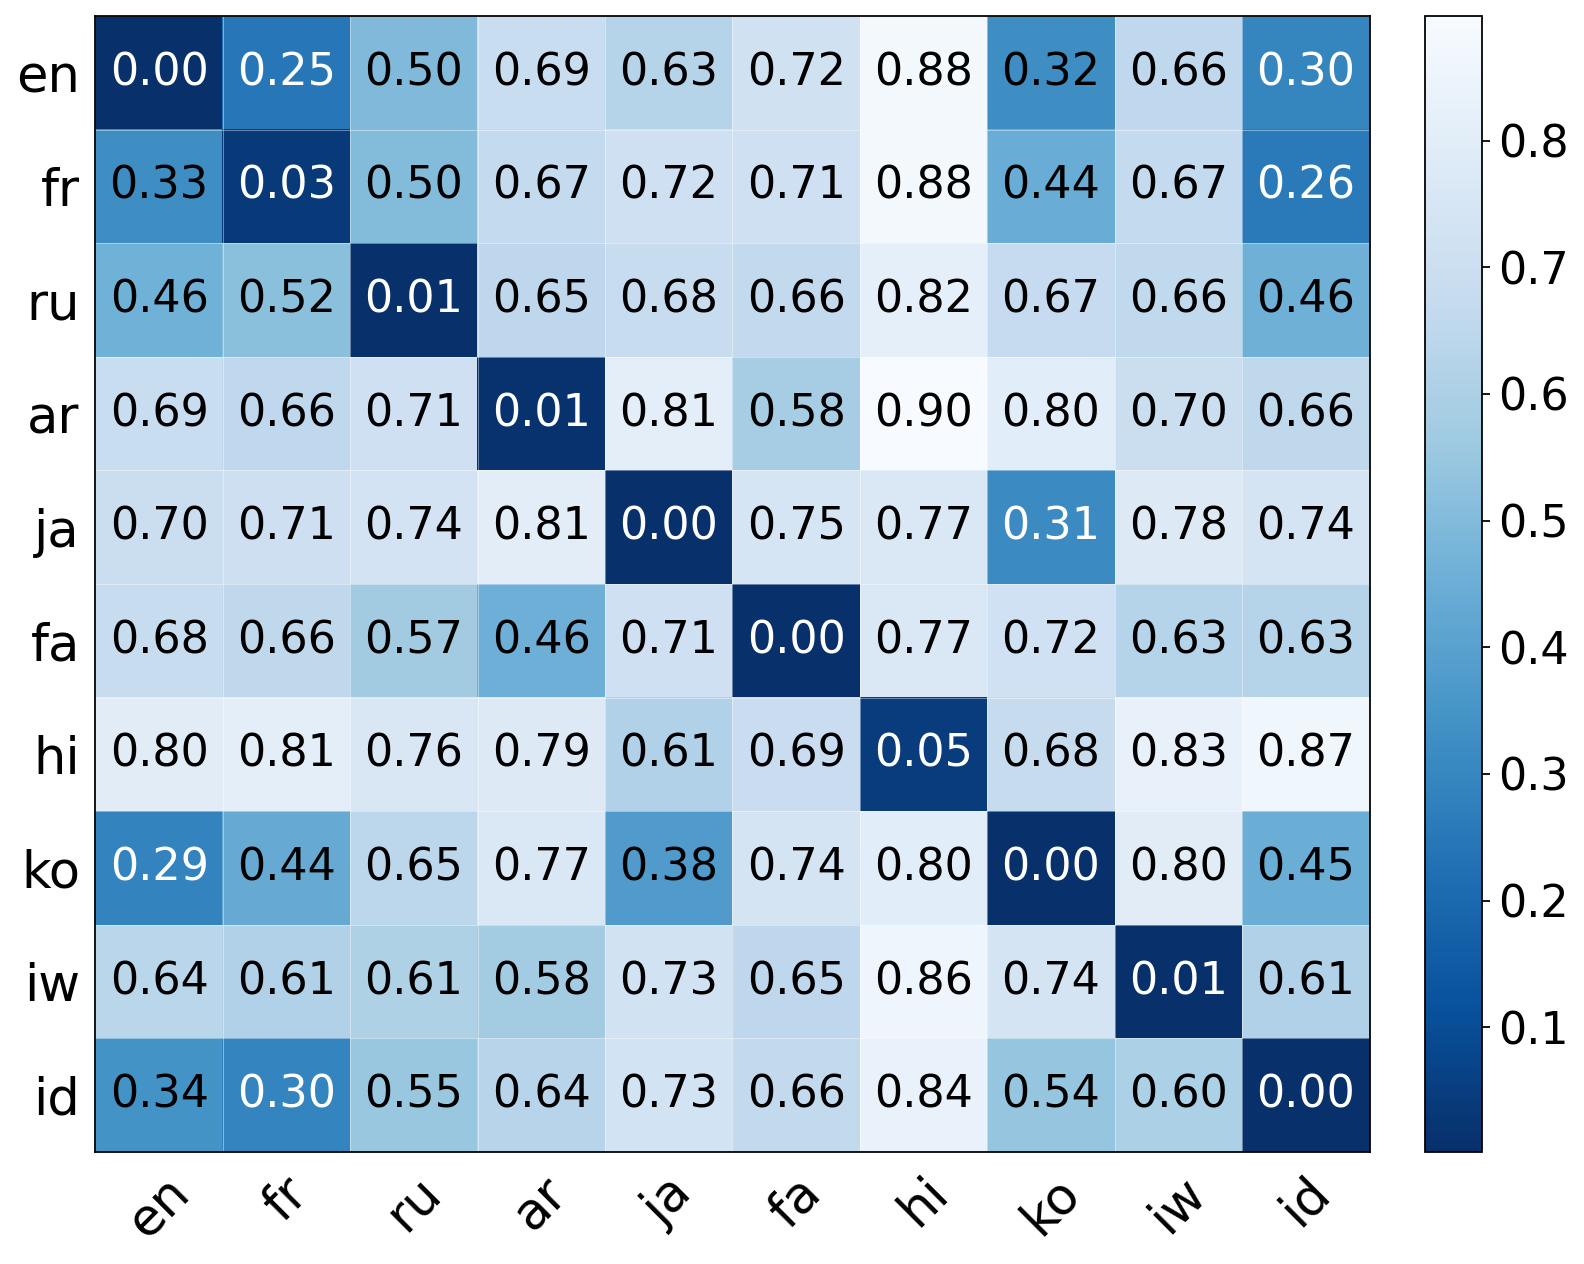

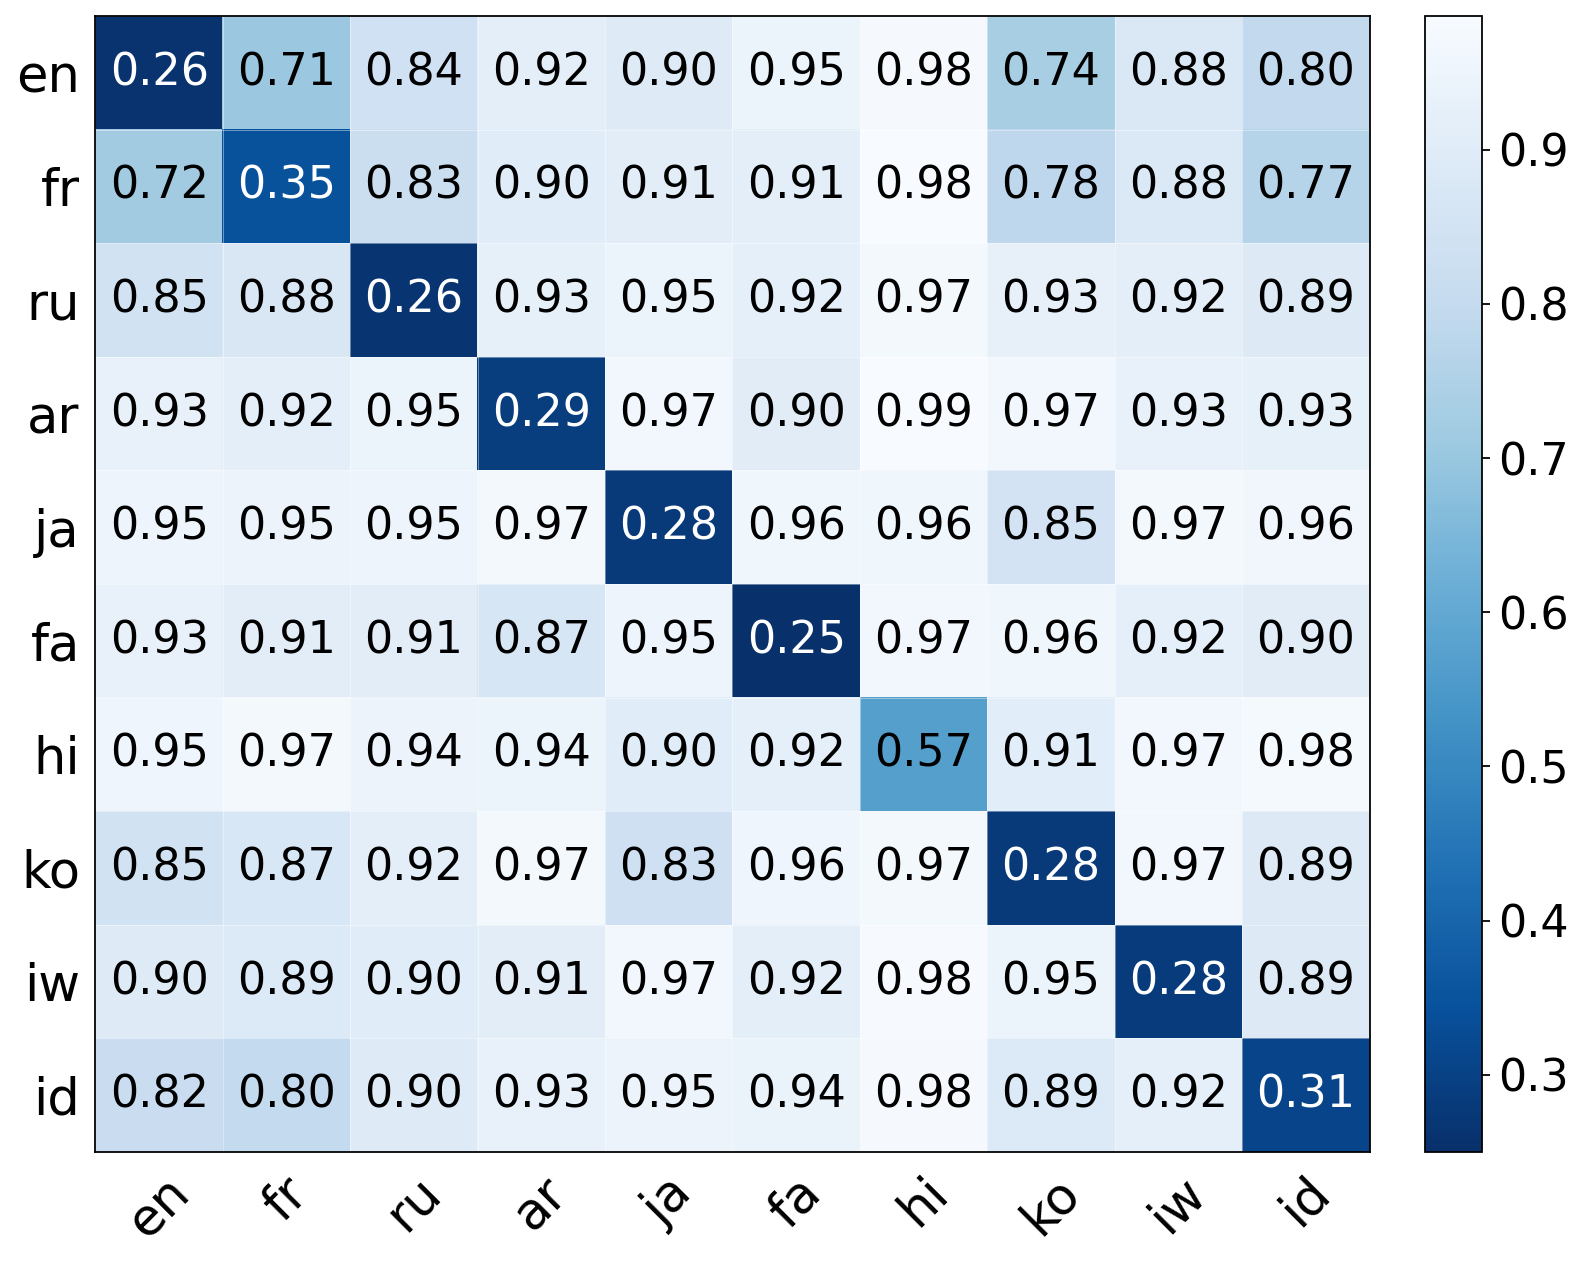

In [36]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def text_color_for_rgba(rgba):
    r, g, b = rgba[:3]
    L = 0.2126*r + 0.7152*g + 0.0722*b  # perceived luminance
    return "white" if L < 0.5 else "black"

def plot_heatmap(df, out_base):
    data = df.values.astype(float)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=160)

    # reversed colormap (so 0=dark blue, 1=light blue)
    data_min = np.nanmin(data)
    data_max = np.nanmax(data)

    # reversed colormap (so min_value=dark blue, max_value=light blue)
    cmap = plt.get_cmap("Blues_r")
    # Set vmin and vmax based on the data's range
    norm = Normalize(vmin=data_min, vmax=data_max)

    im = ax.imshow(data, cmap=cmap, norm=norm, aspect="auto")

    # 1. Get the color bar object using the cax return value
    # We pass the optional cax argument to get the color bar axes back
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # 2. Increase the font size of the tick labels (the numbers)
    cbar.ax.tick_params(labelsize=20) # <--- Increase the size of the numbers

    # 3. If you ever add a label/title to the color bar, you'd set its font size here
    # cbar.set_label("Color Bar Label", fontsize=16)

    ax.set_xticks(range(df.shape[1])); ax.set_yticks(range(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=45, ha="center", fontsize=23)
    ax.set_yticklabels(df.index, fontsize=23)

    ax.set_xticks(np.arange(-.5, df.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, df.shape[0], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3, alpha=0.6)
    ax.tick_params(which="both", bottom=False, left=False)

    # add values
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            s = "" if np.isnan(val) else (f"{val:.2f}" if abs(val) < 10 else f"{val:.0f}")
            rgba = cmap(norm(0 if np.isnan(val) else val))
            ax.text(j, i, s, ha="center", va="center", fontsize=20,
                    color=text_color_for_rgba(rgba))

    fig.tight_layout()
    fig.savefig(f"{out_base}.png", bbox_inches="tight")
    fig.savefig(f"{out_base}.pdf", bbox_inches="tight")
    plt.show()

# ... (The rest of your execution code remains the same)

files = [
    ("grad_diff_KL_prob_forget_ratio_matrix.csv", "heatmap_grad_diff_KL_prob_forget_ratio"),
    ("grad_diff_prob_forget_ratio_matrix.csv", "heatmap_grad_diff_prob_forget_ratio"),
    ("npo_prob_forget_ratio_matrix.csv", "heatmap_npo_prob_forget_ratio"),
]

for fname, out in files:
    df = pd.read_csv(fname, index_col=0)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    plot_heatmap(df, out)



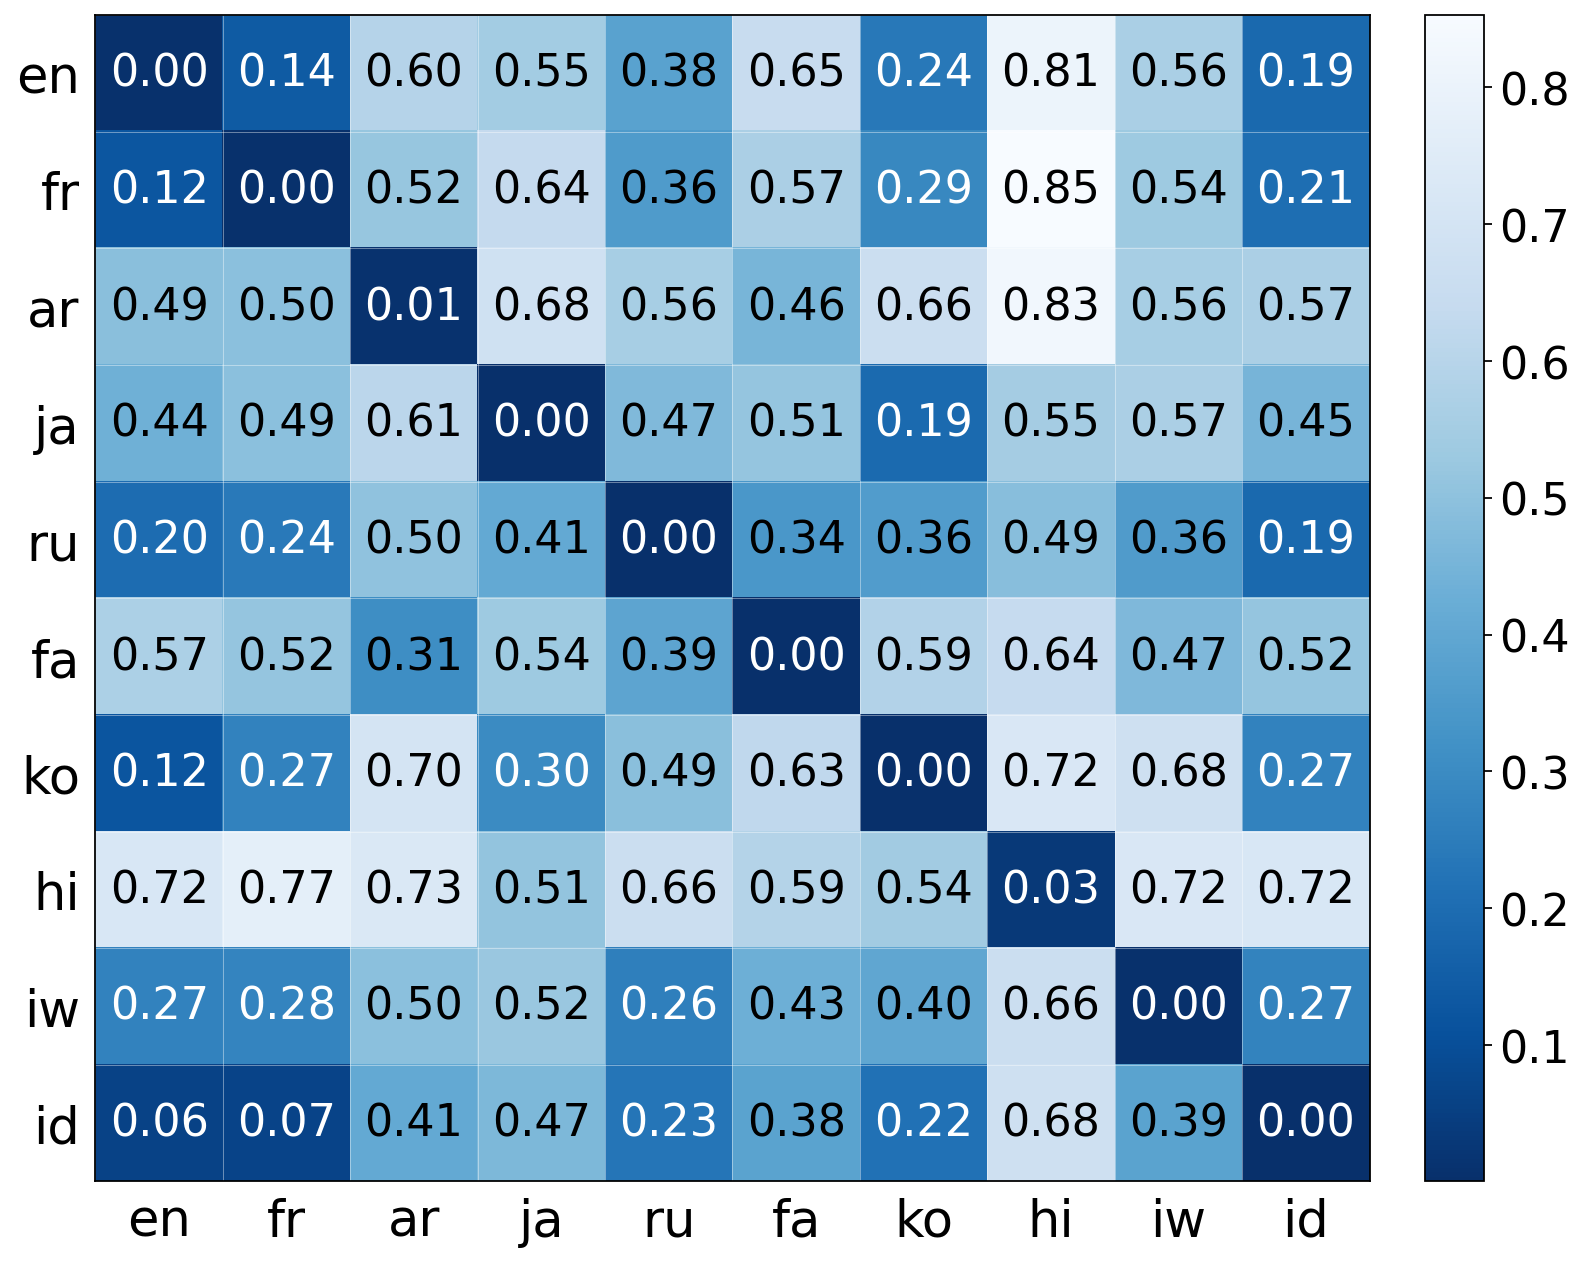

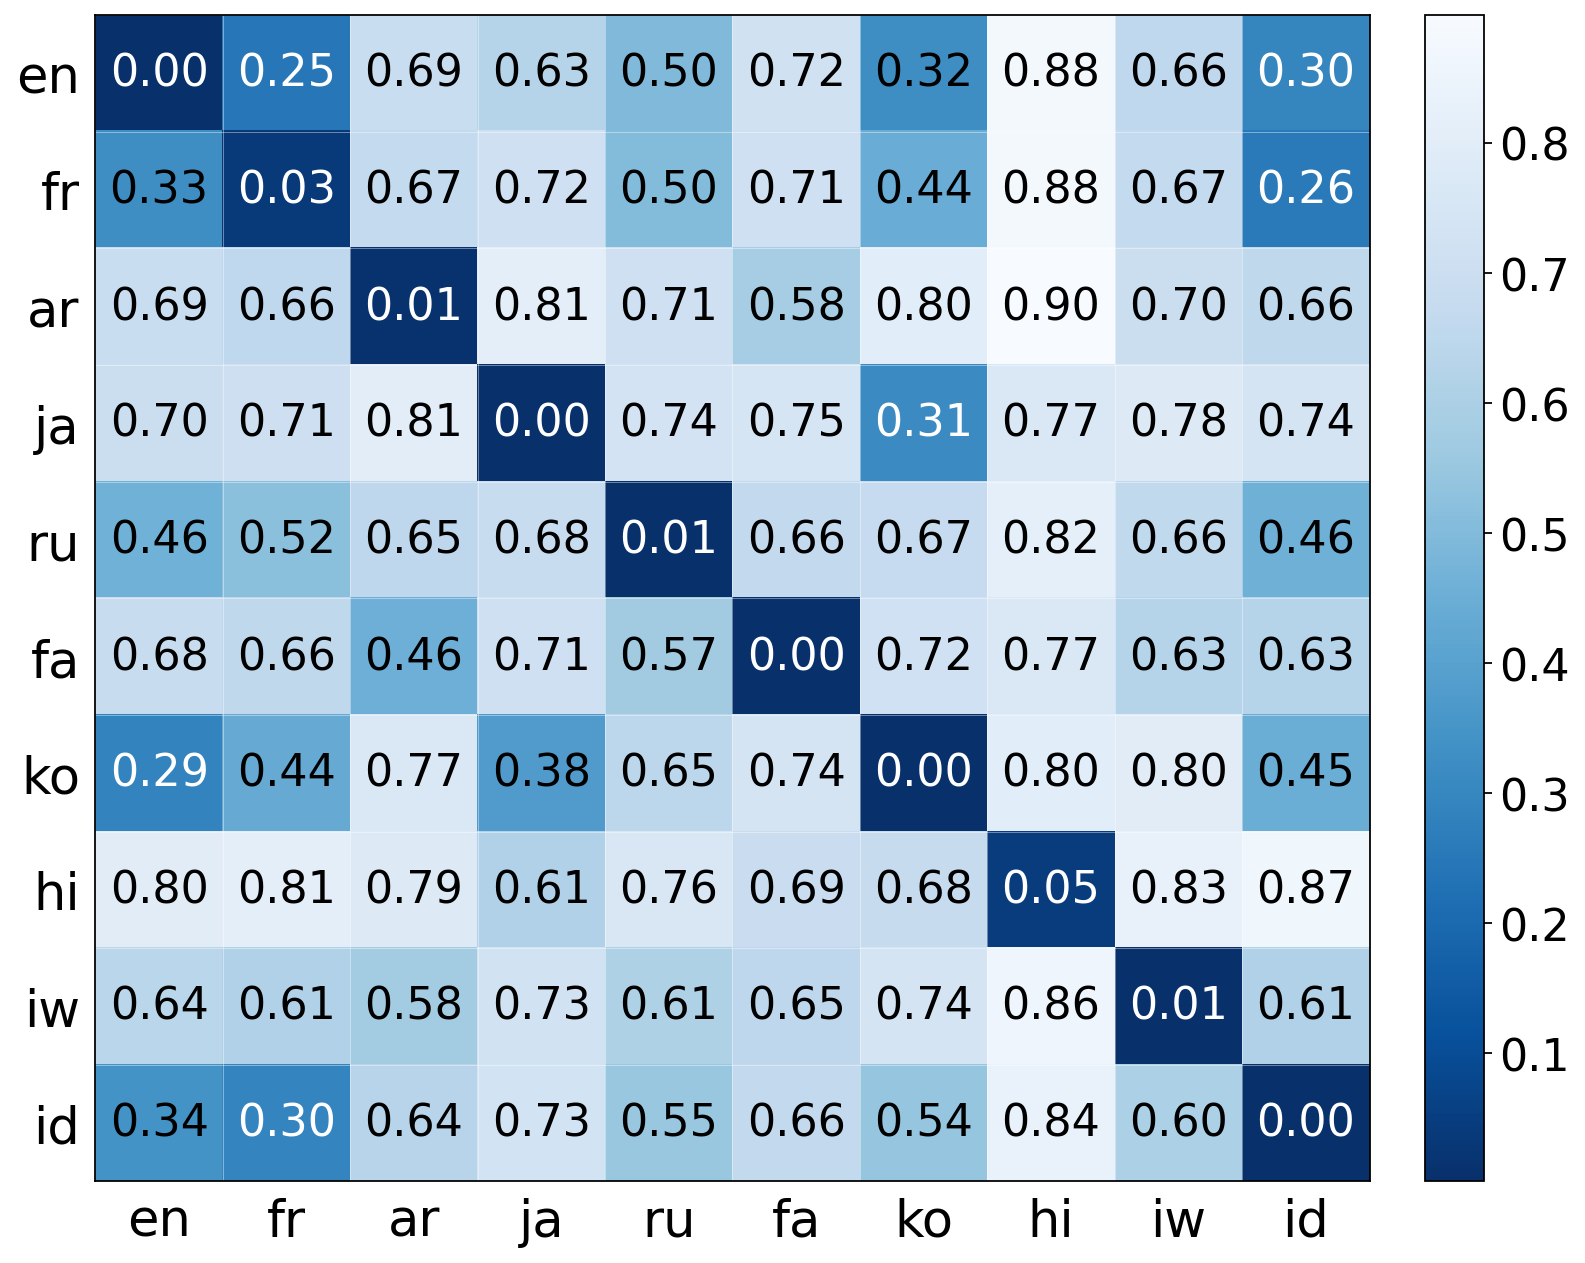

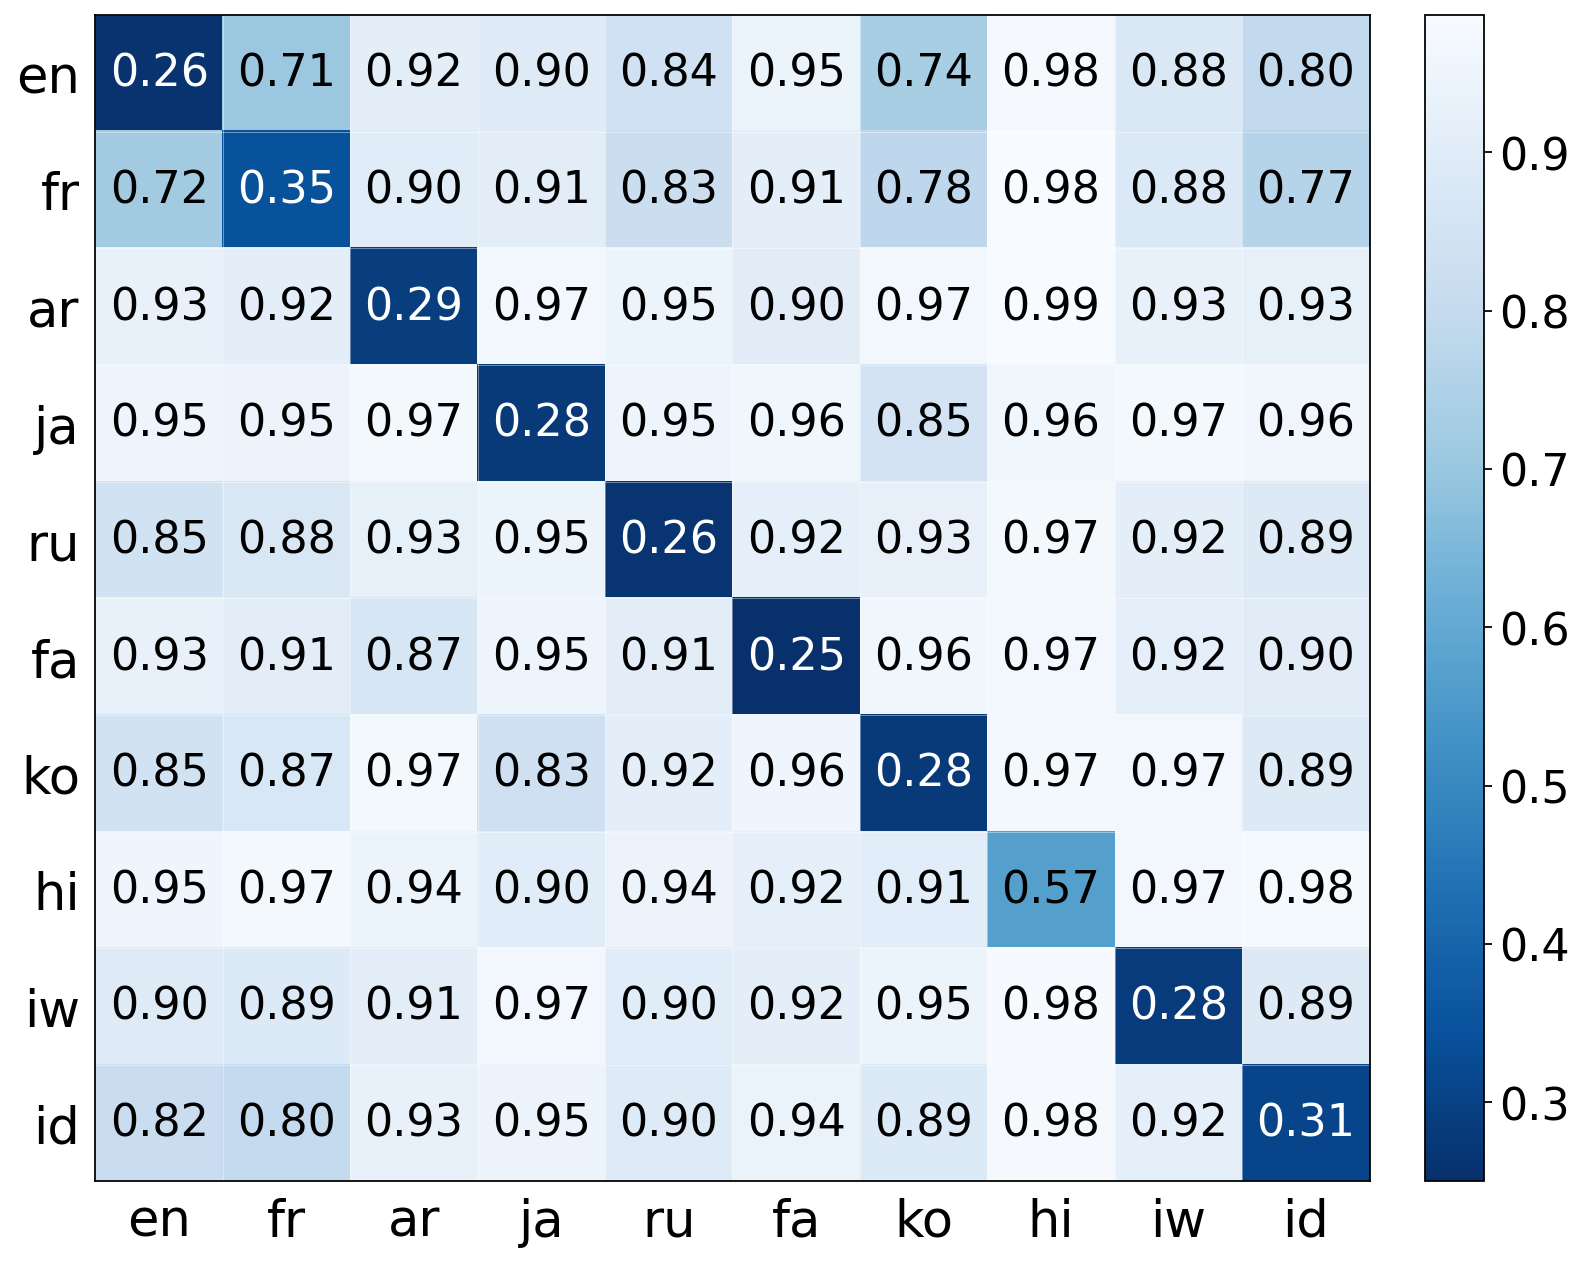

In [3]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# -------- NEW: desired order based on your resource classes --------
LANG_ORDER = ["en","fr","ar","ja","ru","fa","ko","hi","iw","id"]
# -------------------------------------------------------------------

def text_color_for_rgba(rgba):
    r, g, b = rgba[:3]
    L = 0.2126*r + 0.7152*g + 0.0722*b  # perceived luminance
    return "white" if L < 0.5 else "black"

def reorder_df(df: pd.DataFrame) -> pd.DataFrame:
    # Keep only languages present in the dataframe, in the desired order
    ordered_cols = [c for c in LANG_ORDER if c in df.columns]
    # Reorder columns
    df = df.reindex(columns=ordered_cols)
    # If it's a square matrix with matching labels, reorder rows too
    if set(df.index) >= set(ordered_cols):
        df = df.reindex(index=ordered_cols)
    return df

def plot_heatmap(df, out_base):
    df = reorder_df(df)  # <<< NEW: apply ordering
    data = df.values.astype(float)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=160)

    data_min = np.nanmin(data)
    data_max = np.nanmax(data)

    cmap = plt.get_cmap("Blues_r")
    norm = Normalize(vmin=data_min, vmax=data_max)

    im = ax.imshow(data, cmap=cmap, norm=norm, aspect="auto")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=20)

    ax.set_xticks(range(df.shape[1])); ax.set_yticks(range(df.shape[0]))

    # -------- CHANGED: no rotation on x-axis tick labels --------
    ax.set_xticklabels(df.columns, rotation=0, ha="center", fontsize=23)
    ax.set_yticklabels(df.index, fontsize=23)
    # -------------------------------------------------------------

    ax.set_xticks(np.arange(-.5, df.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, df.shape[0], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3, alpha=0.6)
    ax.tick_params(which="both", bottom=False, left=False)

    # add values
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            s = "" if np.isnan(val) else (f"{val:.2f}" if abs(val) < 10 else f"{val:.0f}")
            rgba = cmap(norm(0 if np.isnan(val) else val))
            ax.text(j, i, s, ha="center", va="center", fontsize=20,
                    color=text_color_for_rgba(rgba))

    fig.tight_layout()
    fig.savefig(f"{out_base}.png", bbox_inches="tight")
    fig.savefig(f"{out_base}.pdf", bbox_inches="tight")
    plt.show()

# ... (The rest of your execution code remains the same)

files = [
    ("grad_diff_KL_prob_forget_ratio_matrix.csv", "heatmap_grad_diff_KL_prob_forget_ratio"),
    ("grad_diff_prob_forget_ratio_matrix.csv", "heatmap_grad_diff_prob_forget_ratio"),
    ("npo_prob_forget_ratio_matrix.csv", "heatmap_npo_prob_forget_ratio"),
]

for fname, out in files:
    df = pd.read_csv(fname, index_col=0)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    plot_heatmap(df, out)


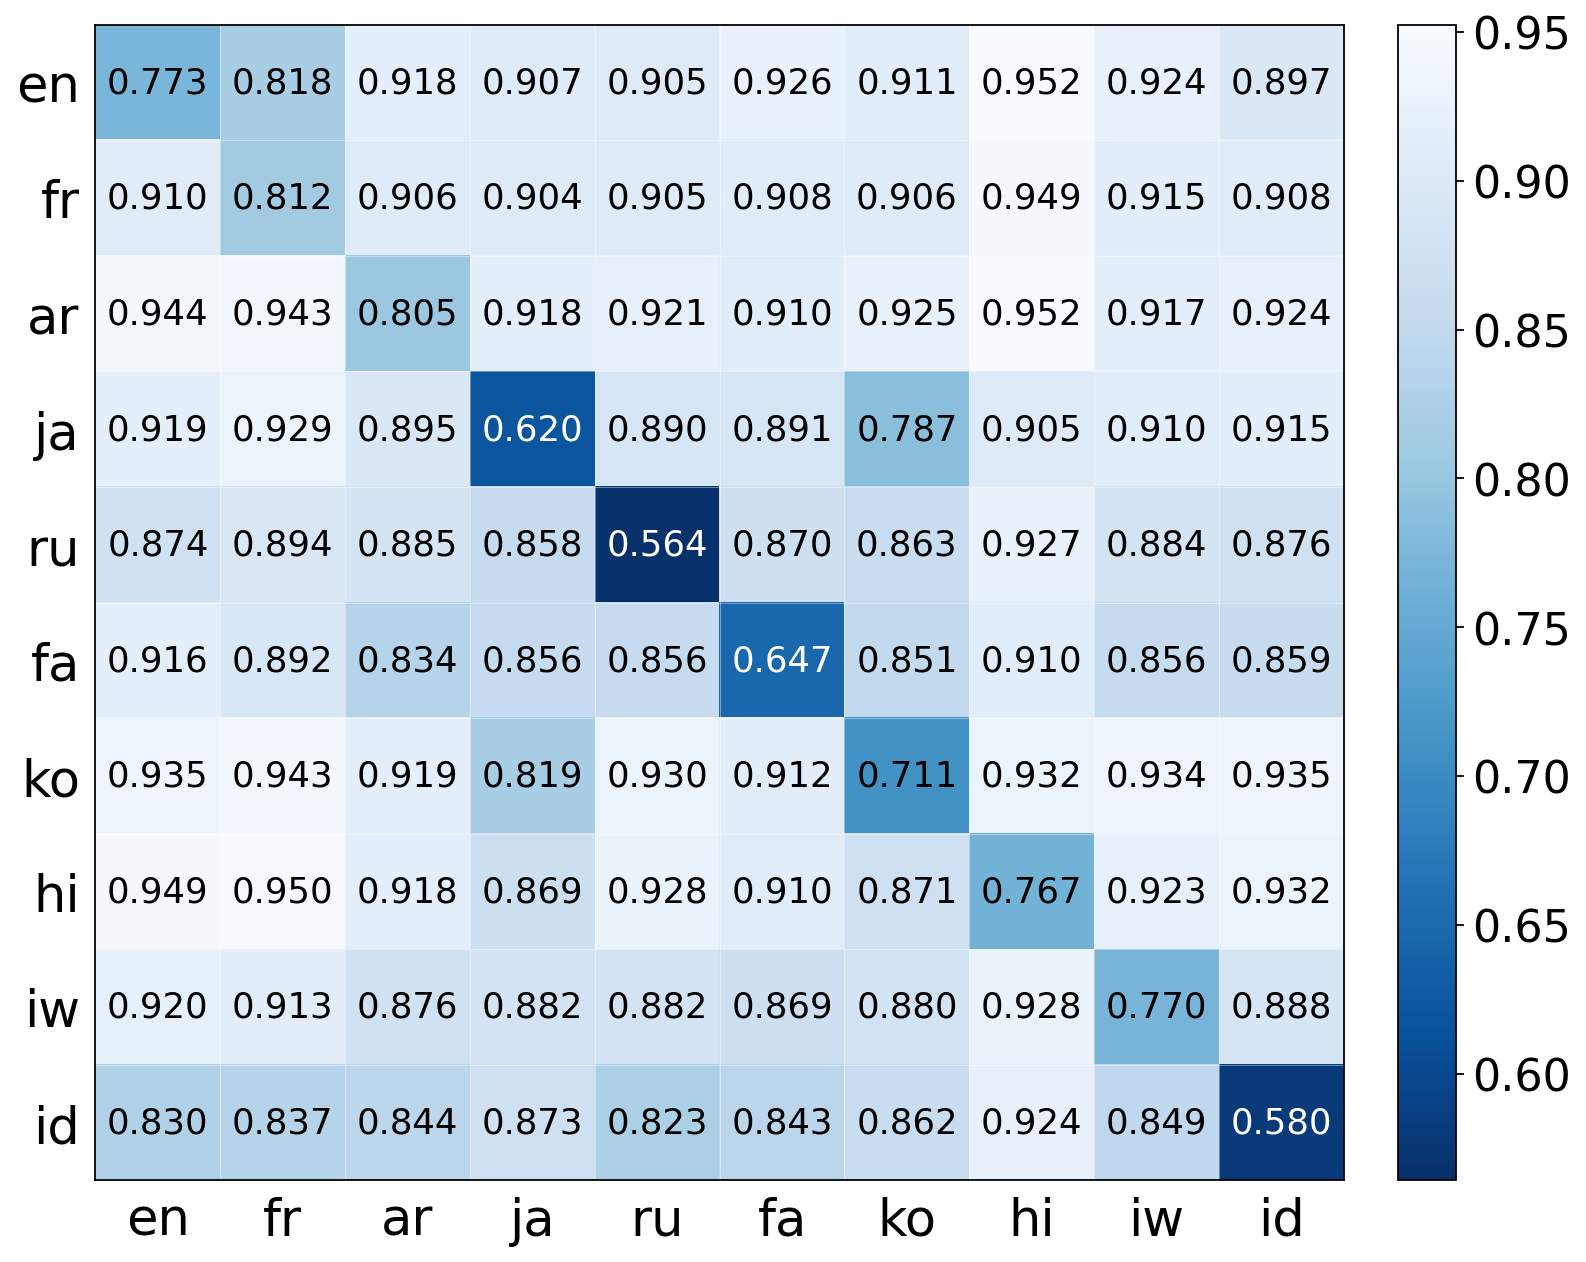

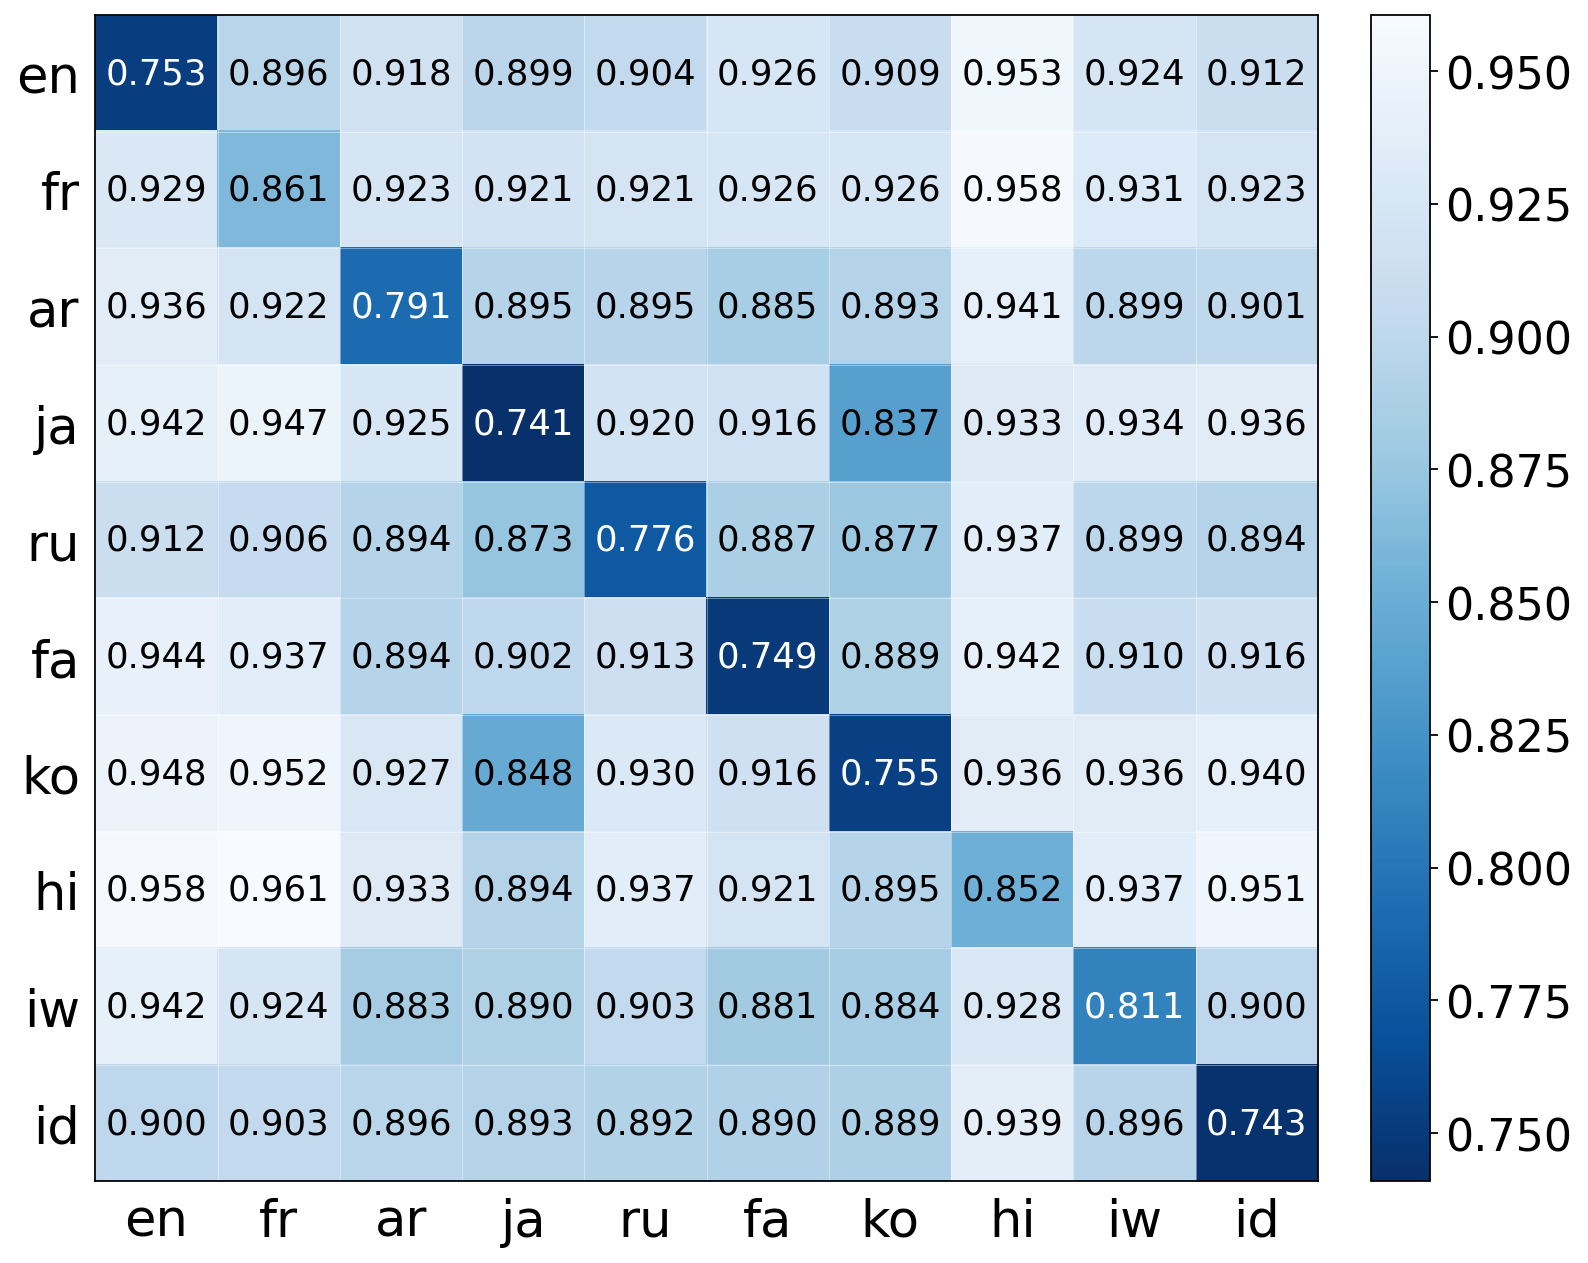

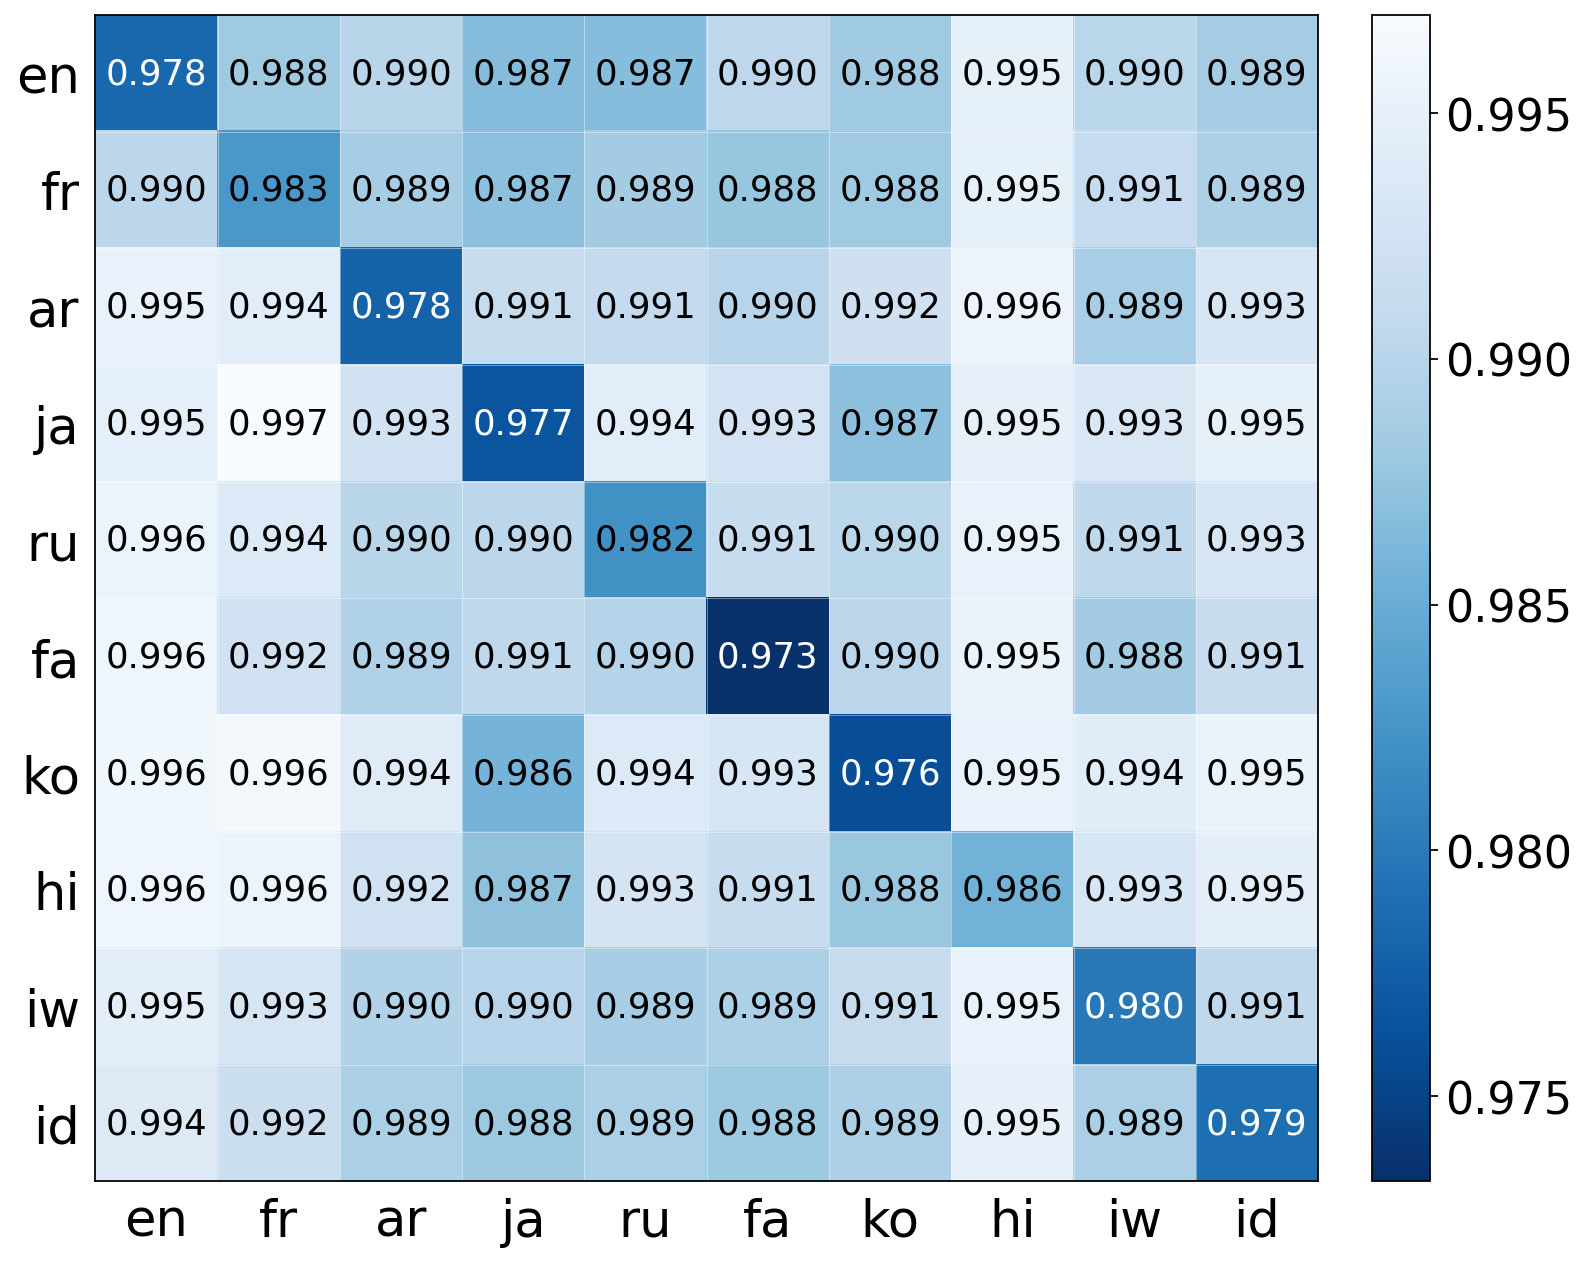

In [9]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# desired language order (lowercase)
LANG_ORDER = ["en", "fr", "ar", "ja", "ru", "fa", "ko", "hi", "iw", "id"]

def text_color_for_rgba(rgba):
    r, g, b = rgba[:3]
    L = 0.2126*r + 0.7152*g + 0.0722*b  # perceived luminance
    return "white" if L < 0.5 else "black"

def reorder_df(df: pd.DataFrame) -> pd.DataFrame:
    # Normalize column/index labels to lowercase
    df.columns = [c.lower() for c in df.columns]
    df.index = [i.lower() for i in df.index]
    
    # Keep only languages in LANG_ORDER that exist in df
    ordered_cols = [c for c in LANG_ORDER if c in df.columns]
    df = df.reindex(columns=ordered_cols)
    
    # If square matrix, reorder rows too
    if set(df.index) >= set(ordered_cols):
        df = df.reindex(index=ordered_cols)
    return df

def plot_heatmap(df, out_base):
    df = reorder_df(df)  # apply the language order
    
    data = df.values.astype(float)
    # data = np.round(data, 2)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=160)

    data_min = np.nanmin(data)
    data_max = np.nanmax(data)

    cmap = plt.get_cmap("Blues_r")
    norm = Normalize(vmin=data_min, vmax=data_max)
    im = ax.imshow(data, cmap=cmap, norm=norm, aspect="auto")

    # colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=20)

    # ticks
    ax.set_xticks(range(df.shape[1]))
    ax.set_yticks(range(df.shape[0]))

    # --- no rotation on x labels ---
    ax.set_xticklabels(df.columns, rotation=0, ha="center", fontsize=23)
    ax.set_yticklabels(df.index, fontsize=23)

    # grid
    ax.set_xticks(np.arange(-.5, df.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, df.shape[0], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3, alpha=0.6)
    ax.tick_params(which="both", bottom=False, left=False)

    # add values
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            s = "" if np.isnan(val) else (f"{val:.3f}" if abs(val) < 10 else f"{val:.0f}")
            rgba = cmap(norm(0 if np.isnan(val) else val))
            ax.text(j, i, s, ha="center", va="center", fontsize=16,
                    color=text_color_for_rgba(rgba))

    fig.tight_layout()
    fig.savefig(f"{out_base}.png", bbox_inches="tight")
    fig.savefig(f"{out_base}.pdf", bbox_inches="tight")
    plt.show()

# files to process
files = [
    ("grad_diff_KL_prob_retain_ratio_matrix.csv", "heatmap_grad_diff_KL_prob_retain_ratio"),
    ("grad_diff_prob_retain_ratio_matrix.csv", "heatmap_grad_diff_prob_retain_ratio"),
    ("npo_prob_retain_ratio_matrix.csv", "heatmap_npo_prob_retain_ratio"),
]

for fname, out in files:
    df = pd.read_csv(fname, index_col=0)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    plot_heatmap(df, out)


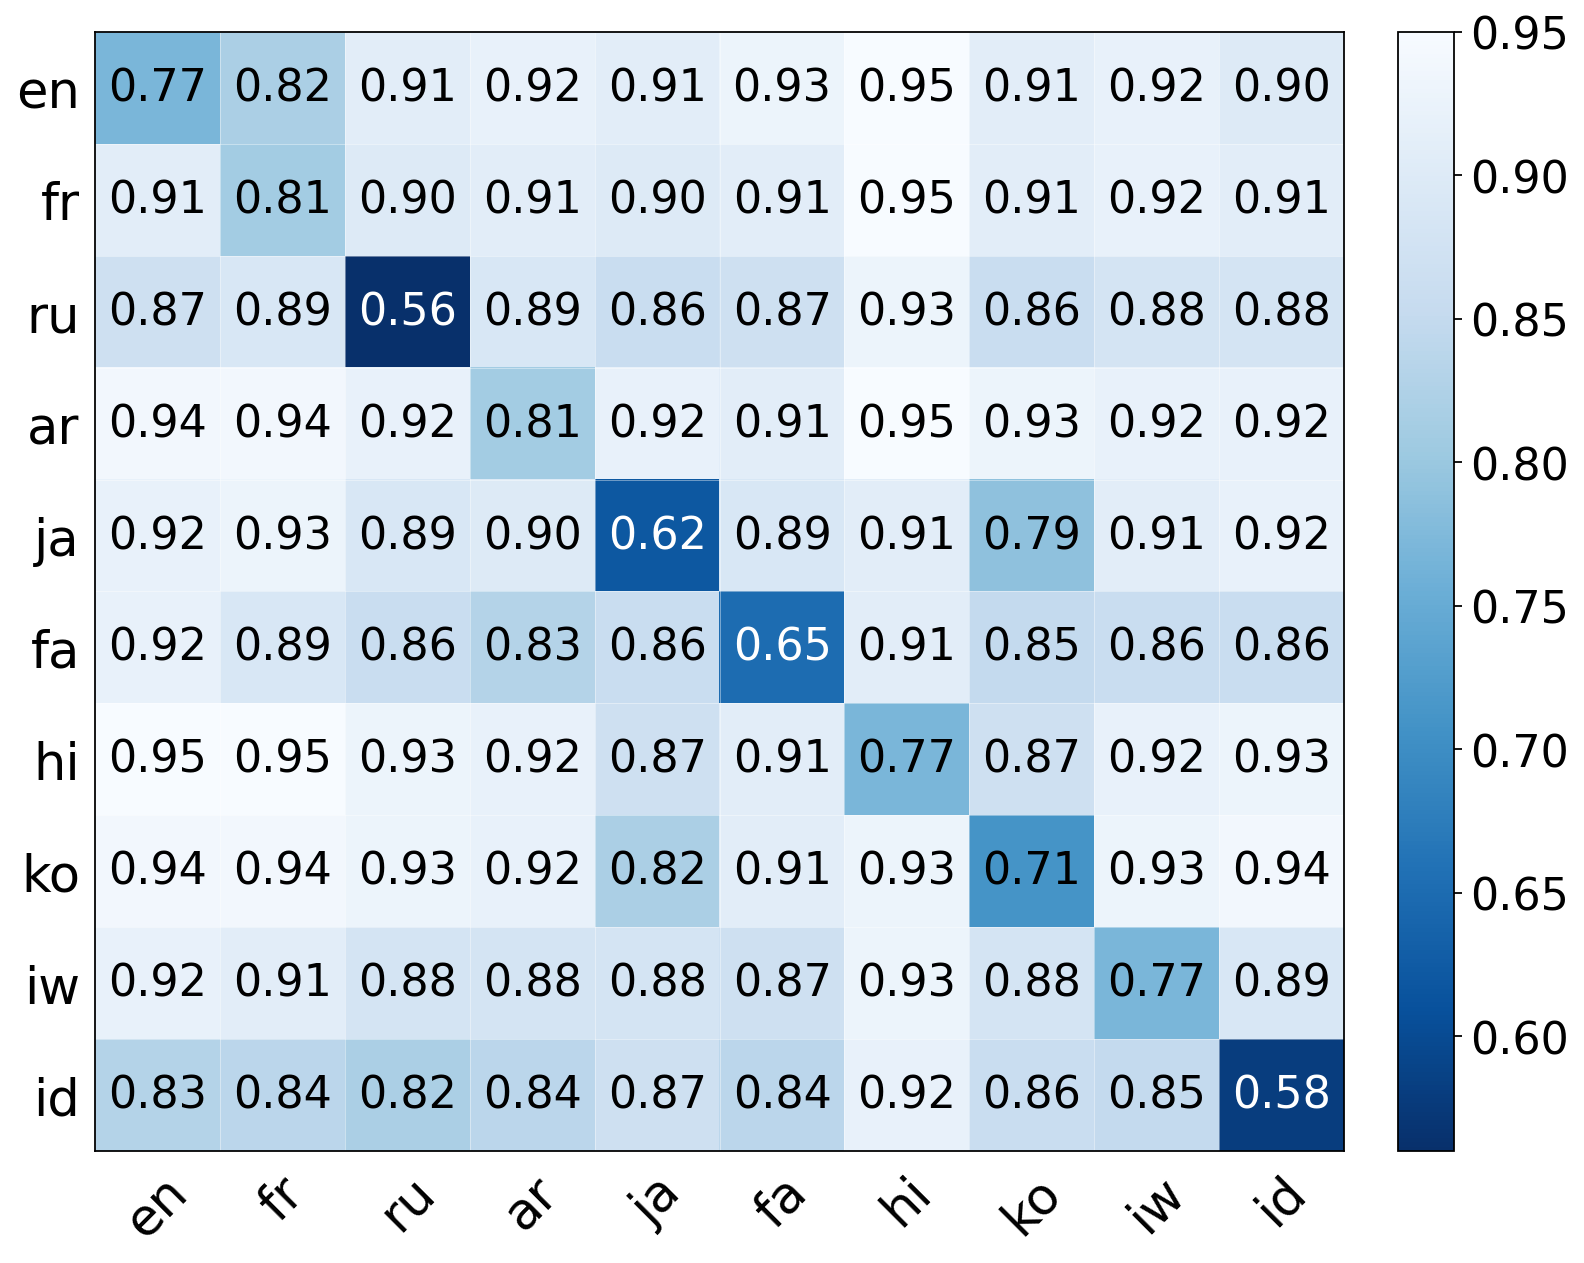

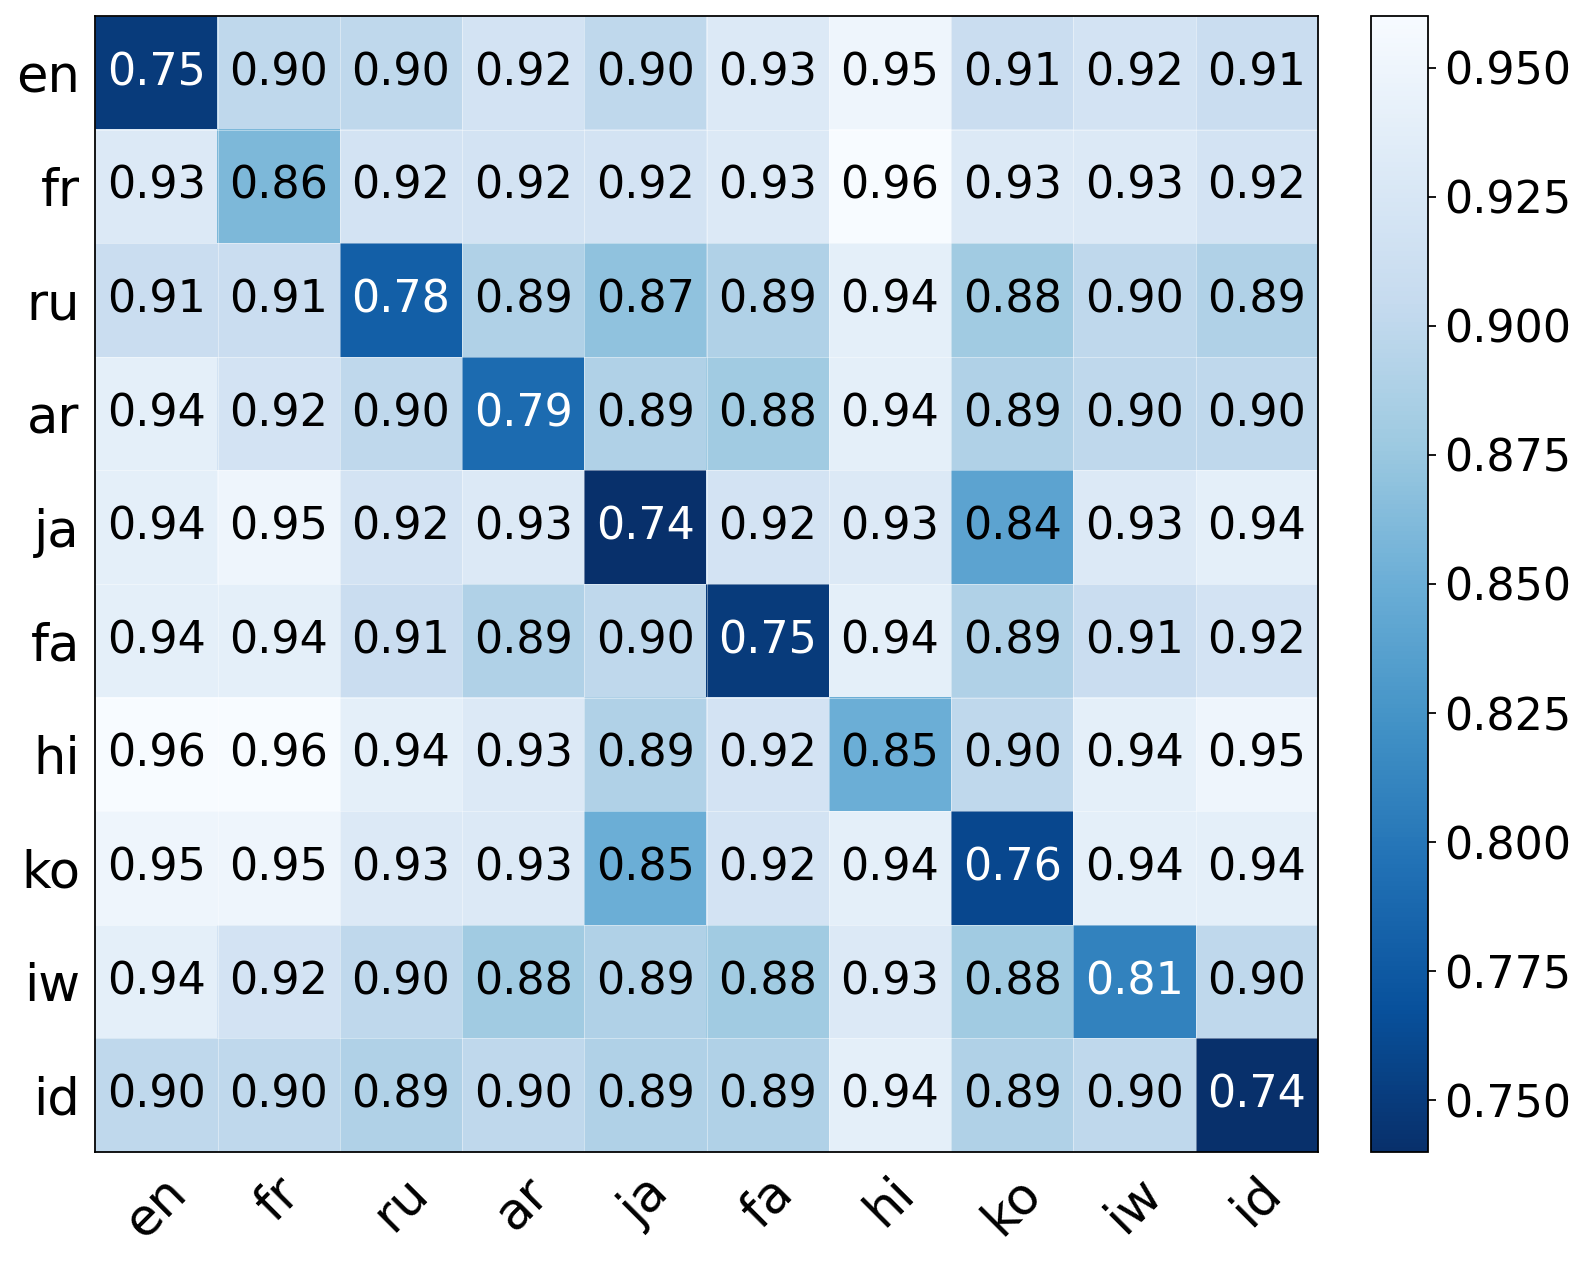

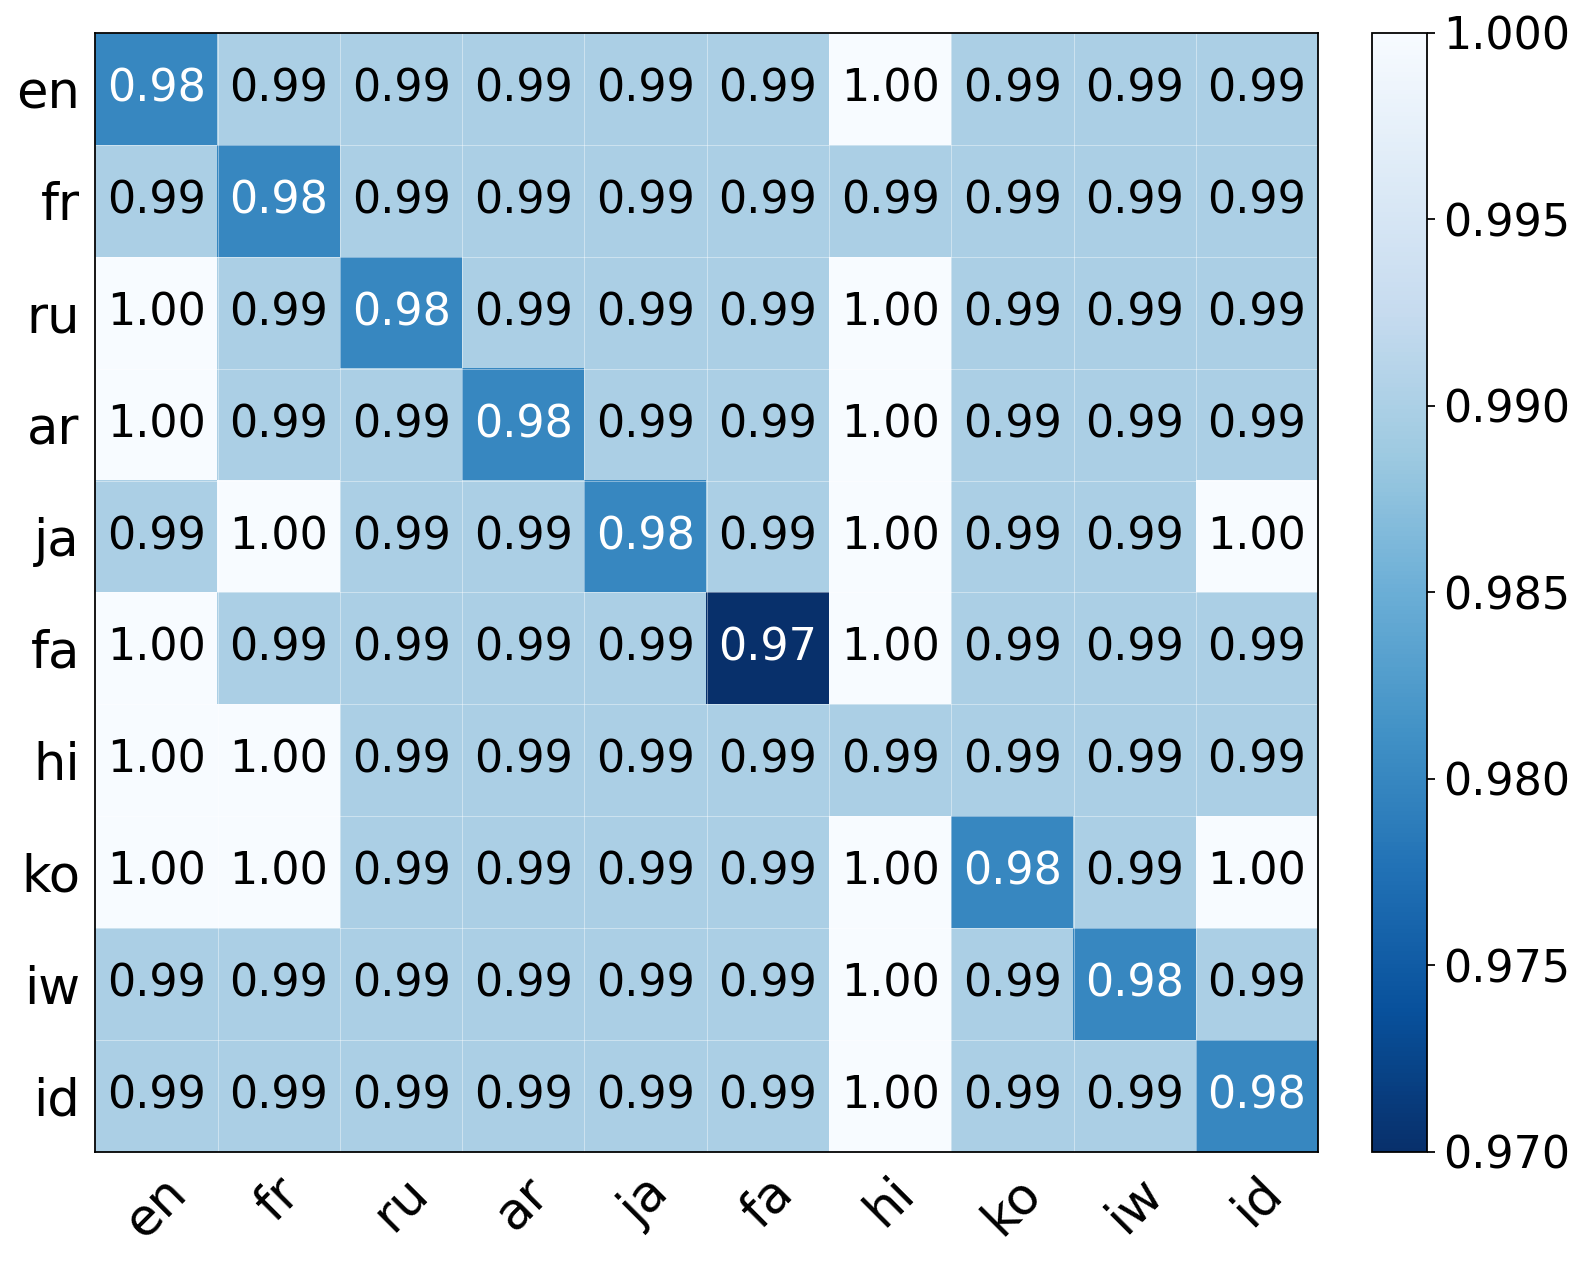

In [39]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def text_color_for_rgba(rgba):
    r, g, b = rgba[:3]
    L = 0.2126*r + 0.7152*g + 0.0722*b  # perceived luminance
    return "white" if L < 0.5 else "black"

def plot_heatmap(df, out_base):
    data = df.values.astype(float)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=160)
    data = np.round(data, 2)
    # reversed colormap (so 0=dark blue, 1=light blue)
    data_min = np.nanmin(data)
    data_max = np.nanmax(data)

    # reversed colormap (so min_value=dark blue, max_value=light blue)
    cmap = plt.get_cmap("Blues_r")
    # Set vmin and vmax based on the data's range
    norm = Normalize(vmin=data_min, vmax=data_max)

    im = ax.imshow(data, cmap=cmap, norm=norm, aspect="auto")

    # 1. Get the color bar object using the cax return value
    # We pass the optional cax argument to get the color bar axes back
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # 2. Increase the font size of the tick labels (the numbers)
    cbar.ax.tick_params(labelsize=20) # <--- Increase the size of the numbers

    # 3. If you ever add a label/title to the color bar, you'd set its font size here
    # cbar.set_label("Color Bar Label", fontsize=16)

    ax.set_xticks(range(df.shape[1])); ax.set_yticks(range(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=45, ha="center", fontsize=23)
    ax.set_yticklabels(df.index, fontsize=23)

    ax.set_xticks(np.arange(-.5, df.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, df.shape[0], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3, alpha=0.6)
    ax.tick_params(which="both", bottom=False, left=False)

    # add values
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = data[i, j]
            s = "" if np.isnan(val) else (f"{val:.2f}" if abs(val) < 10 else f"{val:.0f}")
            rgba = cmap(norm(0 if np.isnan(val) else val))
            ax.text(j, i, s, ha="center", va="center", fontsize=20,
                    color=text_color_for_rgba(rgba))

    fig.tight_layout()
    fig.savefig(f"{out_base}.png", bbox_inches="tight")
    fig.savefig(f"{out_base}.pdf", bbox_inches="tight")
    plt.show()

files = [
    ("grad_diff_KL_prob_retain_ratio_matrix.csv", "heatmap_grad_diff_KL_prob_retain_ratio"),
    ("grad_diff_prob_retain_ratio_matrix.csv", "heatmap_grad_diff_prob_retain_ratio"),
    ("npo_prob_retain_ratio_matrix.csv", "heatmap_npo_prob_retain_ratio"),
]

for fname, out in files:
    df = pd.read_csv(fname, index_col=0)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    plot_heatmap(df, out)



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy.ma as ma

# ---------- helpers ----------
def text_color(rgba):
    r, g, b = rgba[:3]
    L = 0.2126*r + 0.7152*g + 0.0722*b
    return "white" if L < 0.5 else "black"

def read_matrix(path, mapping):
    df = pd.read_csv(path, index_col=0)
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    # rename rows and cols using mapping (3-letter → 2-letter)
    df.rename(index=mapping, columns=mapping, inplace=True)
    return df

def draw_heatmap(ax, df, cmap, norm, annotate=True):
    data_full = df.values.astype(float)
    
    # 1. Create a mask for the STRICTLY upper triangular part (k=1)
    # This ensures the LOWER triangle INCLUDING the diagonal is plotted
    mask = np.triu(np.ones_like(data_full), k=1).astype(bool)
    data_masked = np.ma.masked_array(data_full, mask=mask)
    
    # Use the masked array for imshow.
    im = ax.imshow(data_masked, cmap=cmap, norm=norm, aspect="auto")

    # 2. Increase the font size of the tick labels
    ax.set_xticks(range(df.shape[1]))
    ax.set_yticks(range(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=45, ha="right", fontsize=20)
    ax.set_yticklabels(df.index, fontsize=20)
    
    # 3. Remove the box/spines around the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Ensure ticks only appear at data points and are not offset
    ax.tick_params(top=False, bottom=True, left=True, right=False)

    if annotate:
        for i in range(df.shape[0]):
            for j in range(df.shape[1]):
                val = data_full[i, j]
                # Only annotate the LOWER triangular part INCLUDING the diagonal (i >= j)
                if i >= j: 
                    s, rgba = f"{val:.2f}", cmap(norm(val))
                    ax.text(j, i, s, ha="center", va="center", fontsize=20,
                            color=text_color(rgba))
    return im

# ---------- mapping ----------
ISO1_TO_ISO3 = {
    "en": "eng", "fr": "fra", "ru": "rus", "ar": "arb", "ja": "jpn",
    "fa": "fas", "hi": "hin", "ko": "kor", "he": "heb", "iw": "heb",
    "id": "ind", "in": "ind"
}
# reverse dictionary (ISO-3 → ISO-2)
ISO3_TO_ISO1 = {v: k for k, v in ISO1_TO_ISO3.items()}

# ---------- main ----------
files = [
    ("../lang2vec_inventory_distance_matrix.csv", "inventory"),
    ("../lang2vec_phonological_distance_matrix.csv", "phonological"),
    ("../lang2vec_syntactic_distance_matrix.csv", "syntactic"),
]

# Assuming files are present for the rest of the script
dfs = [(name, read_matrix(path, ISO3_TO_ISO1)) for path, name in files]

# unified color scale (Greenish color scheme)
vmin = min(np.nanmin(df.values) for _, df in dfs)
vmax = max(np.nanmax(df.values) for _, df in dfs)
cmap = plt.get_cmap("Blues_r")  # reversed: 0=dark, 1=light
norm = Normalize(vmin=vmin, vmax=vmax)

# individual plots
for name, df in dfs:
    fig, ax = plt.subplots(figsize=(10, 8), dpi=160)
    im = draw_heatmap(ax, df, cmap, norm)
    # ax.set_title(f"{name.capitalize()} Distance Matrix (Lower Triangle + Diagonal)", fontsize=22)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=20)
    fig.tight_layout()
    fig.savefig(f"heatmap_lang2vec_{name}_lower_diag_blue_nobox.png", bbox_inches="tight")
    fig.savefig(f"heatmap_lang2vec_{name}_lower_diag_blue_nobox.pdf", bbox_inches="tight")
    plt.close(fig)

# combined plot (side-by-side)
fig, axes = plt.subplots(1, 3, figsize=(24, 7), dpi=180) 
for ax, (name, df) in zip(axes, dfs):
    im = draw_heatmap(ax, df, cmap, norm)
    ax.set_title(name.capitalize(), fontsize=20)
cbar = fig.colorbar(im, ax=axes, fraction=0.02, pad=0.04)
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel("Distance", rotation=270, labelpad=30, fontsize=20)
fig.tight_layout()
fig.savefig("heatmap_lang2vec_combined_lower_diag_greens_nobox.png", bbox_inches="tight")
fig.savefig("heatmap_lang2vec_combined_upper_greens.pdf", bbox_inches="tight")

plt.close(fig)

/tmp/ipykernel_564147/1170519973.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


--- Delta Perplexities ---
[[0.61 0.5  0.63 0.53 0.27 0.53 0.71 0.61 0.67 0.4 ]
 [0.96 1.1  1.18 0.96 0.48 1.08 1.33 1.17 1.18 0.73]
 [1.23 1.14 2.57 1.36 0.65 1.57 1.77 1.58 1.57 1.  ]
 [0.99 0.95 1.38 1.43 0.54 1.28 1.42 1.29 1.29 0.82]
 [1.06 1.02 1.56 1.22 0.9  1.46 1.51 1.4  1.45 0.96]
 [0.73 0.7  1.06 0.87 0.42 1.44 1.06 0.95 0.95 0.6 ]
 [0.73 0.73 0.94 0.73 0.37 0.83 1.45 0.89 0.93 0.6 ]
 [1.1  1.   1.39 1.08 0.59 1.25 1.46 1.34 1.77 0.95]
 [0.8  0.73 1.04 0.81 0.44 0.94 1.07 1.02 1.09 0.83]
 [0.61 0.61 0.86 0.69 0.34 0.76 0.88 1.12 0.87 0.52]]

--- Summary Statistics (Q1, Q3, Max) ---
en  Q1=0.507  Q3=0.625  Max=0.710
fr  Q1=0.960  Q3=1.177  Max=1.330
fa  Q1=1.162  Q3=1.578  Max=2.570
ar  Q1=0.960  Q3=1.357  Max=1.430
hi  Q1=1.030  Q3=1.457  Max=1.560
iw  Q1=0.707  Q3=1.032  Max=1.440
id  Q1=0.730  Q3=0.920  Max=1.450
ja  Q1=1.020  Q3=1.377  Max=1.770
ko  Q1=0.803  Q3=1.035  Max=1.090
ru  Q1=0.610  Q3=0.867  Max=1.120


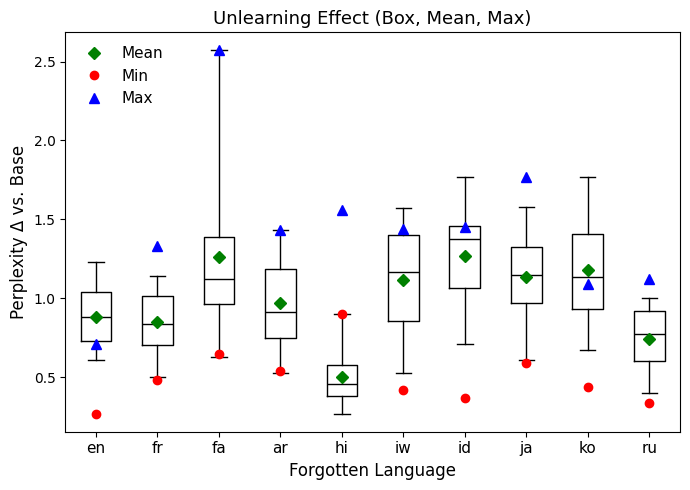

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data setup ---
eval_langs = ["en","fr","fa","ar","hi","iw","id","ru","ja","ko"]
models = [
    "Fine-tuned (Base)",
    "Forget English (en)",
    "Forget French (fr)",
    "Forget Farsi (fa)",
    "Forget Arabic (ar)",
    "Forget Hindi (hi)",
    "Forget Hebrew (iw)",
    "Forget Indonesian (id)",
    "Forget Japanese (ja)",
    "Forget Korean (ko)",
    "Forget Russian (ru)",
]
P = np.array([
    [16.71,9.97,10.71,8.47,4.86,11.48,14.29,13.02,13.14,8.68], # Base
    [17.32,10.47,11.34,9.00,5.13,12.01,15.00,13.63,13.81,9.08],
    [17.67,11.07,11.89,9.43,5.34,12.56,15.62,14.19,14.32,9.41],
    [17.94,11.11,13.28,9.83,5.51,13.05,16.06,14.60,14.71,9.68],
    [17.70,10.92,12.09,9.90,5.40,12.76,15.71,14.31,14.43,9.50],
    [17.77,10.99,12.27,9.69,5.76,12.94,15.80,14.42,14.59,9.64],
    [17.44,10.67,11.77,9.34,5.28,12.92,15.35,13.97,14.09,9.28],
    [17.44,10.70,11.65,9.20,5.23,12.31,15.74,13.91,14.07,9.28],
    [17.81,10.97,12.10,9.55,5.45,12.73,15.75,14.36,14.91,9.63],
    [17.51,10.70,11.75,9.28,5.30,12.42,15.36,14.04,14.23,9.51],
    [17.32,10.58,11.57,9.16,5.20,12.24,15.17,14.14,14.01,9.20],
])
baseline = P[0]
deltas = P[1:] - baseline
print("--- Delta Perplexities ---")
print(deltas)

# --- Statistics Printout ---
print("\n--- Summary Statistics (Q1, Q3, Max) ---")
names = [m.split("(")[-1].split(")")[0] for m in models[1:]]
for i, name in enumerate(names):
    arr = deltas[i]
    q1  = np.percentile(arr, 25, interpolation="linear")
    q3  = np.percentile(arr, 75, interpolation="linear")
    print(f"{name:>2}  Q1={q1:.3f}  Q3={q3:.3f}  Max={arr.max():.3f}")

# -------------------------------------------------------------
# --- Larger Boxplot (Corrected) ---
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7,5))

# Boxplot: showmeans=True for 'Mean' in the title, and define meanprops
bp = ax.boxplot(
    deltas,
    whis=[0,100],              # whiskers = true min & max
    showcaps=True,
    showmeans=True,            # <--- CORRECTION 1: Show the mean
    flierprops=dict(marker=''),# Hide outliers
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"), # Default black median
    meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='green', markersize=6), # <--- CORRECTION 1: Mean properties
    patch_artist=False
)

# Draw markers on top: Min (Red Circle) and Max (Blue Triangle)
min_marker, max_marker = None, None # To hold the handles for the legend

for i, arr in enumerate(deltas, start=1):
    # Plotting Min/Max for each language
    min_handle, = ax.plot(i, arr.min(), "o", ms=6, zorder=5, color="red")
    max_handle, = ax.plot(i, arr.max(), "^", ms=7, zorder=6, color="blue")

    # Store handles from the last plot for the legend
    if i == len(deltas):
        min_marker = min_handle
        max_marker = max_handle


# Get handles for legend elements from the boxplot (for the mean)
mean_marker = bp['means'][0] # Get one of the mean markers

# Labels
xticklabels = [m.split("(")[-1].split(")")[0] for m in models[1:]]
ax.set_xticks(range(1,len(xticklabels)+1))
ax.set_xticklabels(xticklabels, fontsize=11)

ax.set_ylabel("Perplexity Δ vs. Base", fontsize=12)
ax.set_xlabel("Forgotten Language", fontsize=12)
ax.set_title("Unlearning Effect (Box, Mean, Max)", fontsize=13)

# Constructing a clean legend (using the handles collected)
# <--- CORRECTION 2: Explicitly define legend handles and labels
ax.legend(
    [mean_marker, min_marker, max_marker],
    ["Mean", "Min", "Max"],
    frameon=False,
    fontsize=11,
    loc='upper left'
)

plt.tight_layout()
plt.show()



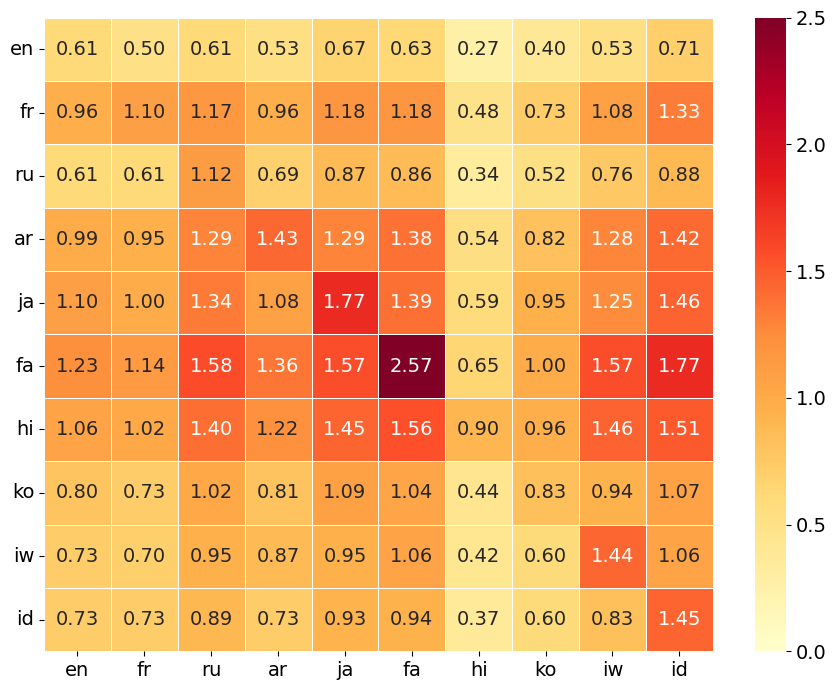

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data setup ---
eval_langs = ["en","fr","fa","ar","hi","iw","id","ru","ja","ko"]
models = [
    "Fine-tuned (Base)",
    "Forget English (en)",
    "Forget French (fr)",
    "Forget Farsi (fa)",
    "Forget Arabic (ar)",
    "Forget Hindi (hi)",
    "Forget Hebrew (iw)",
    "Forget Indonesian (id)",
    "Forget Japanese (ja)",
    "Forget Korean (ko)",
    "Forget Russian (ru)",
]

# Perplexity matrix P (includes Base model on the first row)
P = np.array([
    [16.71,9.97,10.71,8.47,4.86,11.48,14.29,13.02,13.14,8.68], # Base
    [17.32,10.47,11.34,9.00,5.13,12.01,15.00,13.63,13.81,9.08],
    [17.67,11.07,11.89,9.43,5.34,12.56,15.62,14.19,14.32,9.41],
    [17.94,11.11,13.28,9.83,5.51,13.05,16.06,14.60,14.71,9.68],
    [17.70,10.92,12.09,9.90,5.40,12.76,15.71,14.31,14.43,9.50],
    [17.77,10.99,12.27,9.69,5.76,12.94,15.80,14.42,14.59,9.64],
    [17.44,10.67,11.77,9.34,5.28,12.92,15.35,13.97,14.09,9.28],
    [17.44,10.70,11.65,9.20,5.23,12.31,15.74,13.91,14.07,9.28],
    [17.81,10.97,12.10,9.55,5.45,12.73,15.75,14.36,14.91,9.63],
    [17.51,10.70,11.75,9.28,5.30,12.42,15.36,14.04,14.23,9.51],
    [17.32,10.58,11.57,9.16,5.20,12.24,15.17,14.14,14.01,9.20],
])

# --- Desired order for both rows (models) and columns (languages) ---
desired_order = ["en", "fr", "ru", "ar", "ja", "fa", "hi", "ko", "iw", "id"]

# --- Compute ΔPerplexity (vs Base) ---
baseline = P[0]
deltas_matrix = P[1:] - baseline

# Short language codes for models (row labels)
mu_target_langs = [m.split("(")[-1].split(")")[0] for m in models[1:]]

# --- Reorder rows and columns ---
# Row order (forget models)
row_order_idx = [mu_target_langs.index(lang) for lang in desired_order]
deltas_matrix = deltas_matrix[row_order_idx, :]
mu_target_langs = [mu_target_langs[i] for i in row_order_idx]

# Column order (evaluation languages)
col_order_idx = [eval_langs.index(lang) for lang in desired_order]
deltas_matrix = deltas_matrix[:, col_order_idx]
eval_langs = [eval_langs[i] for i in col_order_idx]

# --- Convert to DataFrame for plotting ---
df_deltas = pd.DataFrame(deltas_matrix, index=mu_target_langs, columns=eval_langs)

# --- Plot Heatmap ---
plt.figure(figsize=(9, 7))
ax = sns.heatmap(
    df_deltas,
    annot=True,
    fmt=".2f",
    linewidths=.5,
    linecolor='white',
    cmap="YlOrRd",
    annot_kws={"fontsize": 14},
    vmin=0.0,
    vmax=2.5
)

# Formatting
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
# cbar.set_label('Increase in Perplexity (ΔPPL)', fontsize=14)

plt.yticks(rotation=0)
plt.tight_layout()

# Save
plt.savefig('heatmap_perplexity_delta.pdf')
plt.show()


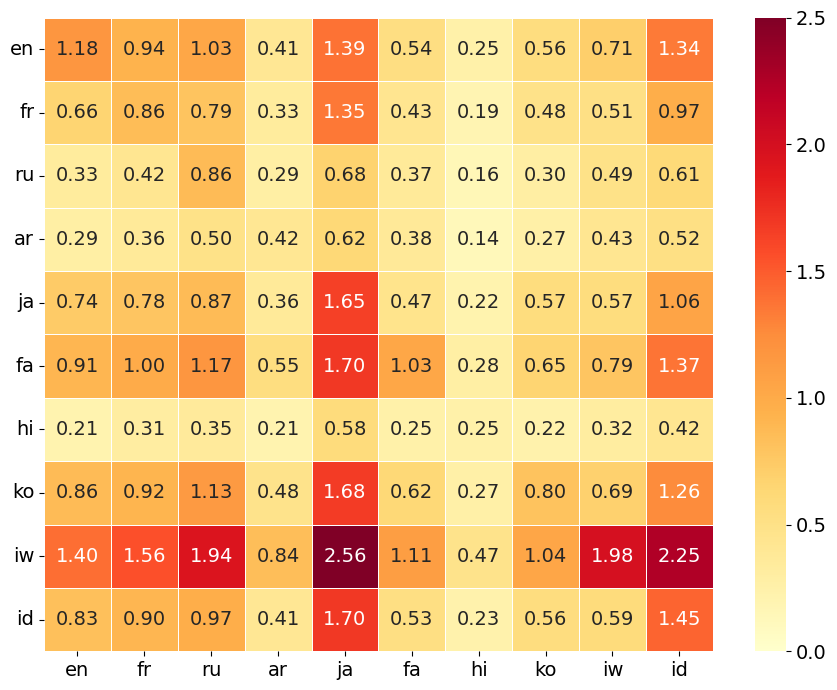

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data setup ---
eval_langs = ["en","fr","ru","ar","ja","fa","hi","ko","iw","id"]

models = [
    "Fine-tuned (Base)",
    "Forget English (en)",
    "Forget French (fr)",
    "Forget Farsi (fa)",
    "Forget Arabic (ar)",
    "Forget Hindi (hi)",
    "Forget Hebrew (iw)",
    "Forget Indonesian (id)",
    "Forget Japanese (ja)",
    "Forget Korean (ko)",
    "Forget Russian (ru)",
]

# --- Perplexity matrix P (filled from uploaded files) ---
P = np.array([
    # Base (CohereForAI/aya-expanse-8b)
    [13.9811,  8.5713, 10.9520,  6.8625, 11.4028,  8.5856,  4.1535,  7.4010,  9.5533, 12.0652],
    # Forget en
    [15.1571,  9.5085, 11.9825,  7.2686, 12.7879,  9.1297,  4.4009,  7.9603, 10.2594, 13.4063],
    # Forget fr
    [14.6407,  9.4279, 11.7470,  7.1961, 12.7571,  9.0202,  4.3430,  7.8843, 10.0622, 13.0393],
    # Forget fa
    [14.8870,  9.5696, 12.1248,  7.4138, 13.1004,  9.6167,  4.4368,  8.0554, 10.3439, 13.4351],
    # Forget ar
    [14.2705,  8.9327, 11.4473,  7.2796, 12.0277,  8.9663,  4.2886,  7.6739,  9.9799, 12.5882],
    # Forget hi
    [14.1923,  8.8827, 11.3048,  7.0704, 11.9866,  8.8389,  4.4032,  7.6257,  9.8751, 12.4872],
    # Forget iw
    [15.3847, 10.1309, 12.8870,  7.7068, 13.9603,  9.6915,  4.6262,  8.4393, 11.5376, 14.3125],
    # Forget id
    [14.8103,  9.4759, 11.9243,  7.2706, 13.1005,  9.1176,  4.3807,  7.9623, 10.1389, 13.5131],
    # Forget ja
    [14.7162,  9.3526, 11.8174,  7.2274, 13.0486,  9.0508,  4.3706,  7.9693, 10.1244, 13.1255],
    # Forget ko
    [14.8407,  9.4878, 12.0852,  7.3381, 13.0817,  9.2044,  4.4202,  8.2028, 10.2421, 13.3242],
    # Forget ru (newly added)
    [14.3151,  8.9962, 11.8118,  7.1532, 12.0778,  8.9552,  4.3096,  7.7028, 10.0429, 12.6794],
])

# --- Desired order for both rows and columns ---
desired_order = ["en", "fr", "ru", "ar", "ja", "fa", "hi", "ko", "iw", "id"]

# --- Compute ΔPerplexity (vs Base) ---
baseline = P[0]
deltas_matrix = P[1:] - baseline

# Short language codes for models (row labels)
mu_target_langs = [m.split("(")[-1].split(")")[0] for m in models[1:]]

# --- Reorder rows and columns ---
row_order_idx = [mu_target_langs.index(lang) for lang in desired_order]
deltas_matrix = deltas_matrix[row_order_idx, :]
mu_target_langs = [mu_target_langs[i] for i in row_order_idx]

col_order_idx = [eval_langs.index(lang) for lang in desired_order]
deltas_matrix = deltas_matrix[:, col_order_idx]
eval_langs = [eval_langs[i] for i in col_order_idx]

# --- Convert to DataFrame for plotting ---
df_deltas = pd.DataFrame(deltas_matrix, index=mu_target_langs, columns=eval_langs)

# --- Plot Heatmap ---
plt.figure(figsize=(9, 7))
ax = sns.heatmap(
    df_deltas,
    annot=True,
    fmt=".2f",
    linewidths=.5,
    linecolor='white',
    cmap="YlOrRd",
    annot_kws={"fontsize": 14},
    vmin=0.0,
    vmax=2.5
)

# Formatting
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_perplexity_delta_seegull.pdf')
plt.show()
